<a href="https://colab.research.google.com/github/michalmash/Helicopter-Game/blob/master/Copy_of_Copy_of_MINI_PROJECT%D7%9E%D7%99%D7%9B%D7%9C%D7%95%D7%A9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Present by : Tamar Nissim (315249599) & Michal Mashiach (322276023) 

# **Intro**

### Are you able to recognize facial expressions?

Do you notice that the person standing in front of you is scared or happy?

Humans are accustomed to receiving non-verbal cues from facial emotions.
The task of identifying facial expressions is is quite easy for a human, but it may be a bit challenging for a predictive algorithm because the images have a low resolution,
the faces are not in the same position,
some images have text written on them,
some people hide part of their faces with their hands,
However all this diversity of images will contribute to make a more generalizable model. 

Can you guess which images are related to which expressions?
Now computers are also getting better at reading emotions. 


### So how do we identify emotions in a picture?
### And what is it useful to us? 



The facial recognition technology has many uses like providing security whereas the facial expression recognition technology will be useful for detection of truthfulness or potential deception. 
This is of great use for the police department for solving a crime. The police can analyze if the eyewitness or the suspect is lying which is very useful in analyzing the crime scene . By using this technology, it gets easy to know persons way of thinking and his interest in various aspects which will be very advantageous for various companies for improving their sales. Facial expressions and other gestures are very important in the nonverbal communication which plays a major role in interpersonal relations. So, facial expression recognition, as it extracts and analyzes the information taken from the images or videos, it will be able to deliver the exact or the unbiased emotional responses as data. We achieve the facial recognition by detecting the faces and by analyzing the movement of our eyes, nose, lips etc. and analyzing changes in the appearance of the facial features and classifying various expressions. 

# **Our goal💪**

Our goal is **to categorize each face** based on the emotion shown in the facial expression into one of seven categories :

### Angry, Disgust, Fear, Happy, Sad, urprise, Neutral.

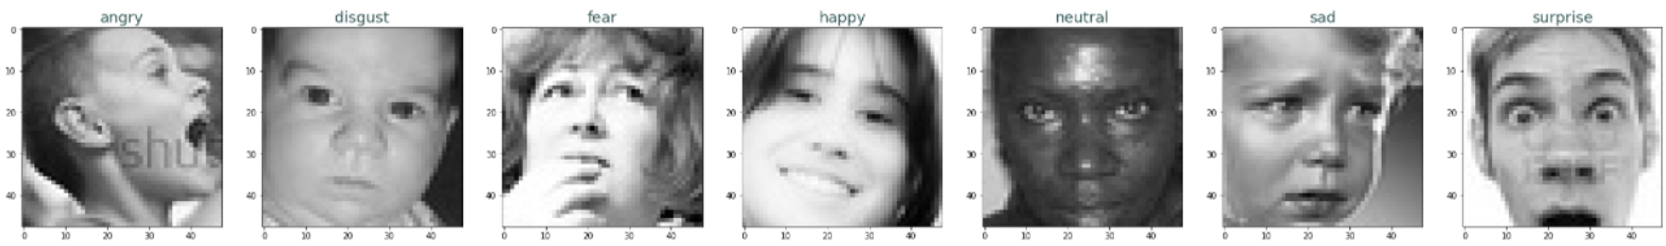

# **First, let's see the data set we will use:**

# Our data set:

The data consists of 48x48 pixel grayscale images of faces. 

The faces have been automatically registered so that the face is more or less centred and occupies about the same amount of space in each image.

 The training set consists of 28,709 examples and the public test set consists of 3,589 examples.

### **The photos are located in our private drive, we will import them**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls gdrive/MyDrive
!unzip drive/MyDrive/faceimage.zip

https://www.kaggle.com/rarb1ack/part-2-ml-group-project-emotion-recognition

**Install Libraries**

In [ ]:
!pip install torchdata
!pip install imblearn

**Import Libraries**

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.image as image

from pprint import pprint

%matplotlib inline

In [ ]:
# # below variables are established to be used throughout the notebook without being subjected to any change
# BATCH_SIZE     = 64
# HEIGHT = WIDTH = 48
# CHANNELS       =  3

# EMOTIONS       = ['surprise', 'fear', 'angry', 'neutral', 'sad', 'disgust', 'happy']

In [ ]:
import os
import re

import numpy as np
import pandas as pd

import cv2
import PIL.Image as Image

import torch
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torch.utils.data import TensorDataset

from imblearn.over_sampling import SMOTE

from sklearn import preprocessing
from sklearn.model_selection import train_test_split

from torchvision import transforms

In [ ]:
import numpy as np
import cv2
import os
from matplotlib import pyplot as plt

**We will load the data, as a DataFrame**

Database is already divided into test and train in the emotion named folders but it is required to have label data to start working. While doing this, all the data has been combined under unique set which will be seperated later according to the 20/80 rule.

A sample of each emotion is illustrated by looping through each emotion sub-folder and looking up the first image to plot as an example. Each example image is annotated with the emotion label assigned to it.



In [ ]:
paths   = [] 
labels  = []
images_angry_train = os.listdir("/content/FACE/face/train/angry")
for file in images_angry_train:
  paths.append(os.path.join("/content/FACE/face/train/angry", file))
  labels.append("angry")


images_disgust_train = os.listdir("/content/FACE/face/train/disgust")
for file in images_disgust_train:
  paths.append(os.path.join("/content/FACE/face/train/disgust", file))
  labels.append("disgust")  
  

images_fear_train = os.listdir("/content/FACE/face/train/fear") 
for file in images_fear_train:
  paths.append(os.path.join("/content/FACE/face/train/fear", file))
  labels.append("fear")

images_happy_train = os.listdir("/content/FACE/face/train/happy")
for file in images_happy_train:
  paths.append(os.path.join("/content/FACE/face/train/happy", file))
  labels.append("happy")

images_netural_train = os.listdir("/content/FACE/face/train/neutral")
for file in images_netural_train:
  paths.append(os.path.join("/content/FACE/face/train/neutral", file))
  labels.append("neutral")
  
images_sad_train = os.listdir("/content/FACE/face/train/sad")
for file in images_sad_train:
  paths.append(os.path.join("/content/FACE/face/train/sad", file))
  labels.append("sad")

images_surprise_train = os.listdir("/content/FACE/face/train/surprise")
for file in images_surprise_train:
  paths.append(os.path.join("/content/FACE/face/train/surprise", file))
  labels.append("surprise")


df = pd.DataFrame({'path': [path for path in paths], 'label': labels})


**create a new column to store the images as ndarray**

In [ ]:
df['img_as_matrix'] = df['path'].apply(lambda path: cv2.imread(path))

**view first 5 rows of the newly created dataframe**

In [ ]:
df.head()

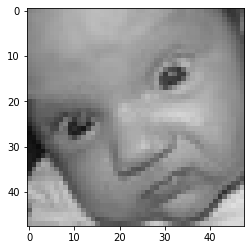

In [ ]:
img = cv2.imread(df.iloc[1]["path"])#מדפיס לי את הפאס התמונה הראשונה בטבלה ע"י לקיחת הפאס ה-0 מהטבלה שבניתי בדיקה בלבד!!!!!! למחוק!!!!💥
plt.imshow(img)

### We will classify each image based on the emotion shown in the facial expression into one of 7 categories.

**Representative sample from each category:**

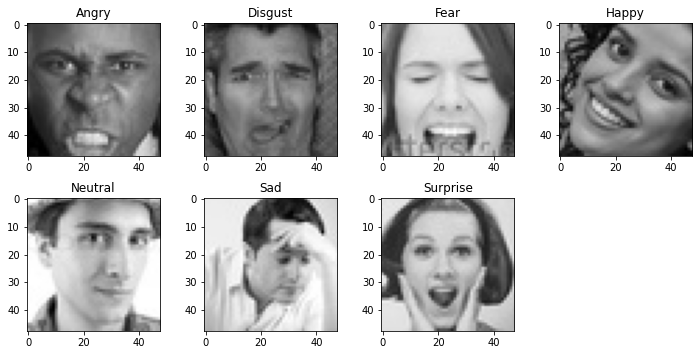

In [ ]:
# set plotting options
fig, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, _)) = plt.subplots(2, 4, figsize=(10, 5))
_.set_visible(False)

for index, label in enumerate(df['label'].unique()):
    img = df[df['label'] == label]['img_as_matrix'].iloc[0]
    
    exec(f"ax{index + 1}.imshow(img)")
    exec(f"ax{index + 1}.set_title(label.title())")
    
fig.tight_layout()

# **# שלב ניקוי הנתונים**

Depending on how over- or under-represented some emotions are, the model can learn a skewed pattern and hence, not generalize well enough when it comes to test data. For instance, in the cell below, we're plotting the number of images per emotion class to understand the underlying distribution. As can be observed, the representation of different classes is dramatically different from others: e.g., disgust is under-represented, while happy is over-represented. This means that our model can be skewed in its predictions due to such discrepancies and hence, imbalance will have to be handled.


בהתאם למידת ייצוג יתר או תת-ייצוג של רגשות מסוימים, המודל יכול ללמוד דפוס מוטה ולפיכך, לא להכליל מספיק טוב בכל הנוגע לנתוני בדיקה. לדוגמה, בתא למטה, אנו משרטטים את מספר התמונות לכל כיתת רגשות כדי להבין את ההתפלגות הבסיסית. כפי שניתן להבחין, הייצוג של מעמדות שונים שונה באופן דרמטי מאחרים: למשל, גועל הוא מיוצג חסר, בעוד שמח הוא ייצוג יתר. משמעות הדבר היא שהמודל שלנו יכול להיות מוטה בתחזיותיו עקב אי-התאמות שכאלו, ולפיכך, יהיה צורך לטפל בחוסר איזון.


<BarContainer object of 7 artists>

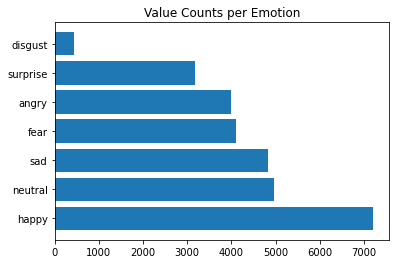

In [ ]:
plt.title('Value Counts per Emotion')
plt.barh(y = df.label.value_counts().index, width = df.label.value_counts().values)

 Handle any missing data. For imagery datasets, discuss what images you might drop and why. The holdout dataset also contains missing data/bad images. Discuss how you handled this in your holdout.

There are images that are far off from the way an average image looks like in an emotion category. To solve this, we find an average image per emotion class, compute the mean error for each image and find whether the mean error is within standard deviation limits. If the mean error is below or above the standard deviation boundaries, then we consider the image as anomalous and drop it.
We perform this for the whole dataset, before splitting it into train / holdout.
In the future, we plan to apply augmentations to images to increase their quality / contrast. For example, adding salt and pepper noise to the train dataset will help to train the model to predict more or less accurately on the bad holdout images.

טיפול בכל הנתונים החסרים.
 עבור מערכי נתונים של תמונות, דון באילו תמונות אתה עלול להפיל ולמה. מערך הנתונים של holdout מכיל גם נתונים חסרים/תמונות רעות. שוחח כיצד טיפלת בזה בעצמך.

יש תמונות שרחוקות מהאופן שבו תמונה ממוצעת נראית בקטגוריית רגש. כדי לפתור זאת, אנו מוצאים תמונה ממוצעת לכל מחלקת רגש, מחשבים את השגיאה הממוצעת עבור כל תמונה ומוצאים האם השגיאה הממוצעת נמצאת בגבולות סטיית התקן. אם השגיאה הממוצעת היא מתחת או מעל לגבולות סטיית התקן, אזי אנו מחשיבים את התמונה כחריגה ומורידים אותה.
אנו מבצעים זאת עבור כל מערך הנתונים, לפני שמפצלים אותו לרכבת / מחזיקה.
בעתיד, אנו מתכננים להחיל הגדלות על תמונות כדי להגביר את האיכות/ניגודיות שלהן. לדוגמה, הוספת רעשי מלח ופלפל למערך הנתונים של הרכבת תעזור לאמן את המודל לחזות פחות או יותר במדויק על תמונות ההחזקה הרעות.

.

**.אנו מוצאים תמונה ממוצעת לכל מחלקת רגש❤️**

In this section, an average image per emotion class is displayed.
 The average image is computed by adding together the array representations of each image in the emotion sub-folder and dividing that sum by the total number of images in the sub-folder to find the mean.

The resulting average images per emotion class are then displayed.




In [ ]:
# store the average image per emotion
average_image_per_label = {}

# compute the average image per label
for index, label in enumerate(df['label'].unique()):
    avg_img = np.stack(df[df['label'] == label]['img_as_matrix']).mean(axis=0).astype(np.int8)
    
    # store the result
    average_image_per_label[label] = avg_img

  #   exec(f"ax{index + 1}.imshow(avg_img)")
  #   exec(f"ax{index + 1}.set_title(label.title())")
    
  # fig.tight_layout()

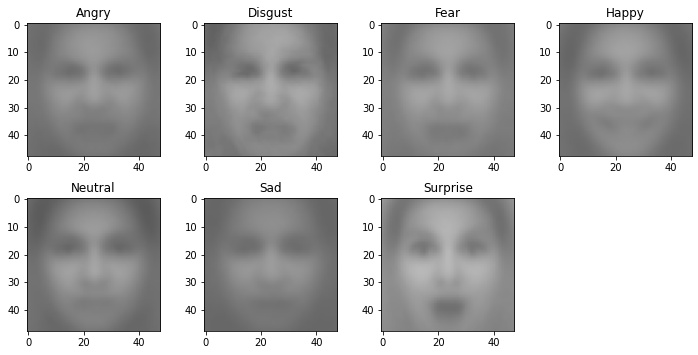

In [ ]:
# setplotting options
# fig, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, _)) = plt.subplots(2, 4, figsize=(10, 5))
# _.set_visible(False)
# for index, label in enumerate(df['label'].unique()):
#     avg_img = np.stack(df[df['label'] == label]['img_as_matrix']).mean(axis=0).astype(np.uint8)
    
#     exec(f"ax{index + 1}.imshow(avg_img)")
#     exec(f"ax{index + 1}.set_title(label.title())")
    
# fig.tight_layout()

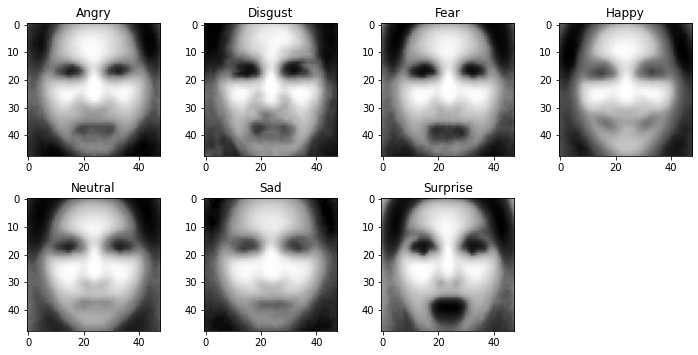

In [ ]:
# set plotting options - equalized images for more transparent view
fig, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, _)) = plt.subplots(2, 4, figsize=(10, 5))
_.set_visible(False)

for index, label in enumerate(df['label'].unique()):
    avg_img   = np.stack(df[df['label'] == label]['img_as_matrix']).mean(axis=0).astype(np.uint8)
    
    R, G, B   = cv2.split(avg_img)

    output1_R = cv2.equalizeHist(R)
    output1_G = cv2.equalizeHist(G)
    output1_B = cv2.equalizeHist(B)

    equ = cv2.merge((output1_R, output1_G, output1_B))
    
    exec(f"ax{index + 1}.imshow(equ)")
    exec(f"ax{index + 1}.set_title(label.title())")
    
fig.tight_layout()

.

.

** **מחשבים את השגיאה הממוצעת עבור כל תמונה**❤️**

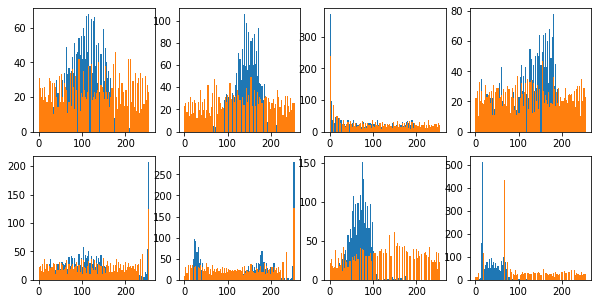

In [ ]:
fig, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8)) = plt.subplots(2, 4, figsize=(10, 5))

for index, img in enumerate(df['img_as_matrix']):
    # calculate mean value from RGB channels and flatten to 1D array
    img_1_chan = img.mean(axis=2).flatten().astype(np.uint8)
    
    # gett same 
    equ = cv2.equalizeHist(img_1_chan)
    
    exec(f"ax{index + 1}.hist(img_1_chan, bins=100, range=(0, 255))")
    exec(f"ax{index + 1}.hist(equ, bins=100, range=(0, 255))")
    
    if index >= 7:
        break

In [ ]:
# store deltas between each image and its label's average
deltas = []

for i in range(len(df)):
    label = df.loc[i, 'label']
    # find the delta between each image and its label's average
    delta = np.absolute(average_image_per_label[label] - df.loc[i, 'img_as_matrix'].astype(np.int8))
    deltas.append(delta)
    
df['delta_vs_avg_image'] = deltas

In [ ]:
# find the mean error across all channels
df['mean_error'] = df['delta_vs_avg_image'].apply(lambda x: x.mean())

In [ ]:
# find an average mean error per group
mean_errors_per_label = df.groupby('label')['mean_error'].mean()

# store standard deviations
error_stds = []

for i in range(len(df)):
    label = df.loc[i, 'label']
    # compute variance between mean error of each image and average error for label
    var = abs(df.loc[i, 'mean_error'] - mean_errors_per_label[label])**2
    # compute standard deviation from variance
    std = np.sqrt(var)
    # store the result
    error_stds.append(std)
    
df['error_std'] = error_stds

In [ ]:
df.head()

,path,label,img_as_matrix,delta_vs_avg_image,mean_error,error_std
0,/content/FACE/face/train/angry/Training_642629...,angry,"[[[46, 46, 46], [66, 66, 66], [64, 64, 64], [6...","[[[69, 69, 69], [47, 47, 47], [47, 47, 47], [4...",35.712240,16.139850
1,/content/FACE/face/train/angry/Training_378592...,angry,"[[[132, 132, 132], [137, 137, 137], [142, 142,...","[[[17, 17, 17], [24, 24, 24], [31, 31, 31], [3...",29.824219,22.027870
2,/content/FACE/face/train/angry/Training_754837...,angry,"[[[190, 190, 190], [208, 208, 208], [188, 188,...","[[[75, 75, 75], [95, 95, 95], [77, 77, 77], [3...",67.050347,15.198258
3,/content/FACE/face/train/angry/Training_144859...,angry,"[[[55, 55, 55], [56, 56, 56], [57, 57, 57], [5...","[[[60, 60, 60], [57, 57, 57], [54, 54, 54], [5...",36.589410,15.262679
4,/content/FACE/face/train/angry/Training_281570...,angry,"[[[255, 255, 255], [255, 255, 255], [254, 254,...","[[[116, 116, 116], [114, 114, 114], [113, 113,...",58.544271,6.692182


**ומוצאים האם השגיאה הממוצעת נמצאת בגבולות סטיית התקן❤️**

In [ ]:
# compute standard deviation boundaries
min_std = df['error_std'].min()
max_std = df['error_std'].max()


# treat the image as anomalous if its mean error is below or above standard deviation boundaries.
def get_anomalous_point(mean_error: float, min_std: float, max_std: float): return mean_error < min_std or mean_error > max_std
    
# mark images as anomalous or not
df['check_for_anomalies'] = df['mean_error'].apply(lambda err: get_anomalous_point(err, min_std, max_std))

**אם השגיאה הממוצעת היא מתחת או מעל לגבולות סטיית התקן, אזי אנו מחשיבים את התמונה כחריגה ומורידים אותה❤️**

In [ ]:
# retrieve indices of the anomalous images to drop
image_indices_to_drop = list(df[df['check_for_anomalies'] == True].index)

# drop anomalous image indices,reset index, and update dataframe
df = df.drop(image_indices_to_drop).reset_index(drop=True)





In [ ]:
# print planned to be dropped indices
print(f"How many images gets dropped: {len(image_indices_to_drop)}\nSome samples: {image_indices_to_drop[:20]}\n")

print("Printing first 5 rows from dataframe")
df.head()

How many images gets dropped: 6594
Some samples: [2, 5, 7, 8, 11, 20, 21, 22, 27, 28, 32, 36, 44, 46, 55, 67, 72, 84, 88, 90]

Printing first 5 rows from dataframe


,path,label,img_as_matrix,delta_vs_avg_image,mean_error,error_std,check_for_anomalies
0,/content/FACE/face/train/angry/Training_642629...,angry,"[[[46, 46, 46], [66, 66, 66], [64, 64, 64], [6...","[[[69, 69, 69], [47, 47, 47], [47, 47, 47], [4...",35.712240,16.139850,False
1,/content/FACE/face/train/angry/Training_378592...,angry,"[[[132, 132, 132], [137, 137, 137], [142, 142,...","[[[17, 17, 17], [24, 24, 24], [31, 31, 31], [3...",29.824219,22.027870,False
2,/content/FACE/face/train/angry/Training_144859...,angry,"[[[55, 55, 55], [56, 56, 56], [57, 57, 57], [5...","[[[60, 60, 60], [57, 57, 57], [54, 54, 54], [5...",36.589410,15.262679,False
3,/content/FACE/face/train/angry/Training_281570...,angry,"[[[255, 255, 255], [255, 255, 255], [254, 254,...","[[[116, 116, 116], [114, 114, 114], [113, 113,...",58.544271,6.692182,False
4,/content/FACE/face/train/angry/Training_859859...,angry,"[[[76, 76, 76], [74, 74, 74], [75, 75, 75], [7...","[[[39, 39, 39], [39, 39, 39], [36, 36, 36], [3...",58.044271,6.192182,False


In [ ]:
💛😉😆😆😆

Task 9: If you are using images/text, discuss whether you are performing classification or regression on your dataset and why (instead of the other one).

We are performing a classification on our dataset and the reason is that we have non-continuous values as our y-labels (in this instance, emotion classes). Regression could have been used if we were trying to predict a continuous value but here the prediction target is discrete.

Task 14: Discuss and implement how you will handle any dataset imbalance.

# **כיצד נטפל בכל חוסר איזון של מערך הנתונים.**


There are a number of ways to deal with data imbalance:

Over-sampling the under-represented class. However, given the big discrepancy in the counts between such classes as surprise and happy, this method might cause the model to overfit.
Under-sampling the over-represented class. However, this can result in a loss of big amounts of useful data.

SMOTE (Synthetic Minority Oversampling Technique). This method selects examples of data in the feature space (a data point and its nearest neighbor), and then creates a synthetic data point in-between them. In essence, this is an augmentation technique to add varying copies of existing data. We chose to go with this option since we do not want to lose data and do not want to experience the effects of over-fitting.

SMOTE (טכניקת דגימת יתר של מיעוטים סינתטיים). שיטה זו בוחרת דוגמאות של נתונים במרחב התכונה (נקודת נתונים ושכנתה הקרובה ביותר), ולאחר מכן יוצרת נקודת נתונים סינתטיים ביניהן. למעשה, זוהי טכניקת הגדלה להוספת עותקים משתנים של נתונים קיימים. בחרנו ללכת על אפשרות זו מכיוון שאיננו רוצים לאבד נתונים ולא רוצים לחוות את ההשפעות של התאמה יתר.

In [ ]:
# view total number of records in dataset
print(f'Length of original dataset is: {len(df)}')

# decrease the dataset to %N samples per each category to solve the memory allocation issue
N_percent       = 0.3

# aggregating storage dataframe
df_agg          = pd.DataFrame(data=[], columns=df.columns)

# per each label, select the first %N samples and append to the aggregating dataframe
for lbl in np.unique(labels):
    len_to_keep = int(N_percent*len(df[df.label == lbl]))
    subset_df   = df[df.label == lbl][:len_to_keep]
    df_agg      = pd.concat([df_agg, subset_df])

# reset index and drop the resulting index column
df_agg          = df_agg.reset_index().drop('index', axis=1)

# view total number of records in the reduced dataset
print(f'Length of reduced dataset is: {len(df_agg)}')

Length of original dataset is: 22115
Length of reduced dataset is: 6632


In [ ]:
# view the resulting df
df_agg.head()

,path,label,img_as_matrix,delta_vs_avg_image,mean_error,error_std,check_for_anomalies
0,/content/FACE/face/train/angry/Training_642629...,angry,"[[[46, 46, 46], [66, 66, 66], [64, 64, 64], [6...","[[[69, 69, 69], [47, 47, 47], [47, 47, 47], [4...",35.712240,16.139850,False
1,/content/FACE/face/train/angry/Training_378592...,angry,"[[[132, 132, 132], [137, 137, 137], [142, 142,...","[[[17, 17, 17], [24, 24, 24], [31, 31, 31], [3...",29.824219,22.027870,False
2,/content/FACE/face/train/angry/Training_144859...,angry,"[[[55, 55, 55], [56, 56, 56], [57, 57, 57], [5...","[[[60, 60, 60], [57, 57, 57], [54, 54, 54], [5...",36.589410,15.262679,False
3,/content/FACE/face/train/angry/Training_281570...,angry,"[[[255, 255, 255], [255, 255, 255], [254, 254,...","[[[116, 116, 116], [114, 114, 114], [113, 113,...",58.544271,6.692182,False
4,/content/FACE/face/train/angry/Training_859859...,angry,"[[[76, 76, 76], [74, 74, 74], [75, 75, 75], [7...","[[[39, 39, 39], [39, 39, 39], [36, 36, 36], [3...",58.044271,6.192182,False


In [ ]:
# initialize the SMOTE model
smote = SMOTE(random_state=62)

# assign labels to y
y = df_agg['label']

# X is a list of read-in images
X = np.stack(df_agg['img_as_matrix'])

# get all dimensions of the resulting X
n_samples, height, width, n_channels = [X.shape[index] for index in range(4)]

print(f"Shape of X before reshape: {X.shape}")

# reshape X because SMOTE accepts only (n_samples, n_channels*height*weight)-type data
X_reshaped = X.reshape(n_samples, n_channels*height*width)

print(f"Shape of X before reshape: {X.shape}")

Shape of X before reshape: (6632, 48, 48, 3)
Shape of X before reshape: (6632, 48, 48, 3)


In [ ]:
# perform re-sampling on modified X given y
X_smote, y_smote = smote.fit_resample(X_reshaped, y)

In [ ]:
print(f'Before re-sampling, the amount of images:  {len(X):6}')
print(f'After re-sampling, the amount of images:{len(X_smote):10}')

Before re-sampling, the amount of images:    6632
After re-sampling, the amount of images:     12159


<BarContainer object of 7 artists>

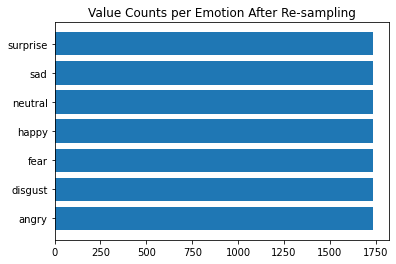

In [ ]:
# view the resulting balanced data(modified distribution)
plt.title('Value Counts per Emotion After Re-sampling')
plt.barh(y = y_smote.value_counts().index, width = y_smote.value_counts().values)

# Task 3: **Correct explanation generalization from such a holdout split.**

> Indented block



For the train / test split the following percentages were chosen: 80%-20%. Of the 80% coming from the train set, 20% is the validation set. Since the data is already balanced, the choice of a random split is a reasonable one.





# **Task 13: Separate your training data into features and labels.**

In [ ]:
# initializing label encoder
label_encoder = preprocessing.LabelEncoder()

# convert X and y to Tensors
X_smote = torch.Tensor(X_smote) # features
y_smote = label_encoder.fit_transform(y_smote) # targets
targets = torch.as_tensor(y_smote)

# split data into train, valid and test
X_train, X_trial, y_train, y_trial = train_test_split(X_smote, targets, test_size=0.20, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.20, random_state=42)

In [ ]:
# print initial shape of the datasets
print(f"Initial shape of the X datasets along with y:\n\
    {X_train.shape}, {y_train.shape}\n\
    {X_valid.shape}, {y_valid.shape}\n\
    {X_trial.shape}, {y_trial.shape}\n")

# reshape to remove the requirements of SMOTE that do not suit standard model training
X_train = X_train.reshape((X_train.shape[0], 3, HEIGHT, WIDTH))
X_valid = X_valid.reshape((X_valid.shape[0], 3, HEIGHT, WIDTH))
X_trial = X_trial.reshape((X_trial.shape[0], 3, HEIGHT, WIDTH))

# print latest shape of the datasets
print(f"Latest shape of the X datasets along with y:\n\
    {X_train.shape}, {y_train.shape}\n\
    {X_valid.shape}, {y_valid.shape}\n\
    {X_trial.shape}, {y_trial.shape}\n")

Initial shape of the X datasets along with y:
    torch.Size([7781, 6912]), torch.Size([7781])
    torch.Size([1946, 6912]), torch.Size([1946])
    torch.Size([2432, 6912]), torch.Size([2432])

Latest shape of the X datasets along with y:
    torch.Size([7781, 3, 48, 48]), torch.Size([7781])
    torch.Size([1946, 3, 48, 48]), torch.Size([1946])
    torch.Size([2432, 3, 48, 48]), torch.Size([2432])



# **Task 2: Holdout dataset split as specified.**

In [ ]:
🤗

In [ ]:
# create train, test and validation datasets for the data loader
train_ds = TensorDataset(X_train,y_train)
valid_ds = TensorDataset(X_valid,y_valid)
trial_ds = TensorDataset(X_trial,y_trial)

NameError: ignored

Task 8: Discuss (and implement if applicable) whether or not you need to scale/normalize your features, and which ones, if any.

Scaling is important to ensure that all images are of the same size and hence, can be accepted by the model. Our image dataset is already well-scaled, with a fixed height and weight parameters as defined at the beginning of this notebook.
Normalization in our image dataset is needed so that each image has similar pixel distribution. This way we reduce the skewness in our dataset.
We will use torchvision.transforms to apply scaling/normalization techniques.

.ToTensor(): converts an image from array to tensor format and adjusts pixel intensities to be between 0 and 1. This is essentially a pixel normalization technique.
.Normalize(): normalizes the image to be between -1 and 1 (given the provided 0.5 input parameter values). This helps reduce skewness and hence, contributes to faster training.
.RandomHorizontalFlip() and .RandomRotation(): this creates synthetic augmented images which can help the model make correct predictions regardless of image position.

קנה מידה חשוב כדי להבטיח שכל התמונות יהיו באותו גודל, ולכן הן יכולות להתקבל על ידי הדגם. מערך התמונות שלנו כבר מוקטן היטב, עם פרמטרי גובה ומשקל קבועים כפי שהוגדרו בתחילת מחברת זו.
יש צורך בנורמליזציה במערך הנתונים של התמונה שלנו כדי שלכל תמונה תהיה הפצת פיקסלים דומה. בדרך זו אנו מפחיתים את הטיומיות במערך הנתונים שלנו.
נשתמש ב-torchvision.transforms כדי ליישם טכניקות קנה מידה/נורמליזציה.

.ToTensor(): ממירה תמונה ממערך לפורמט טנסור ומתאים את עוצמות הפיקסלים להיות בין 0 ל-1. זוהי בעצם טכניקת נורמליזציה של פיקסלים.
.Normalize(): מנרמל את התמונה להיות בין -1 ל-1 (בהינתן 0.5 ערכי פרמטר קלט שסופקו). זה עוזר להפחית את העיוות ומכאן, תורם לאימון מהיר יותר.
.RandomHorizontalFlip() ו-.RandomRotation(): זה יוצר תמונות מוגדלות סינתטיות שיכולות לעזור למודל לבצע תחזיות נכונות ללא קשר למיקום התמונה.
# add data transformations: (1) convert to tensor format

In [ ]:
# add data transformations: (1) convert to tensor format, and (2) normalize the images
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(degrees=180),
])

# apply transformations to the train set
train_ds.transform = transform

# apply transformations to the validation set
valid_ds.transform = transform

# apply transformations to the test set
trial_ds.transform = transform

# create a dataloader for each subset of data
trainloader = DataLoader(train_ds, batch_size=BATCH_SIZE, shuffle=True, drop_last=True)
validloader = DataLoader(valid_ds, batch_size=BATCH_SIZE, shuffle=True, drop_last=True)
trialloader = DataLoader(trial_ds, batch_size=BATCH_SIZE, shuffle=True, drop_last=True)

The dataloaders are set up in the cell above for all three data subsets: train, validation and test. BATCH_SIZE was chosen to be 64, which is rather small, however, it means the model can start learning better since the number of parameters it needs to update per epoch is now higher. shuffle is set to True so that at each epoch the data gets re-shuffled which helps avoid under- or over-fitting. drop_last is set to True to avoid cases where a batch contains just one sample image.

מטעני הנתונים מוגדרים בתא שלמעלה עבור כל שלוש תת-קבוצות הנתונים: רכבת, אימות ובדיקה. BATCH_SIZE נבחר להיות 64, וזה די קטן, עם זאת, זה אומר שהמודל יכול להתחיל ללמוד טוב יותר מכיוון שמספר הפרמטרים שהוא צריך לעדכן לכל תקופה גבוהה יותר. shuffle מוגדר ל-True כך שבכל תקופה הנתונים עוברים ערבוב מחדש, מה שעוזר למנוע תת-התאמה או התאמה יתר. drop_last מוגדר ל-True כדי למנוע מקרים שבהם אצווה מכילה תמונה לדוגמה אחת בלבד.


💛👌🏻😊

Task 9: If you are using images/text, discuss whether you are performing classification or regression on your dataset and why (instead of the other one).

We are performing a classification on our dataset and the reason is that we have non-continuous values as our y-labels (in this instance, emotion classes). Regression could have been used if we were trying to predict a continuous value but here the prediction target is discrete.

Task 10: Give an example of an ordinal feature that you've seen used by others, when it should have been treated as a categorical.

Example: color feature (red, green, blue). People might assume there's a color order, but in fact this is a categorical feature, since there's no particular ordering (and if there is, it's a rather complex one). We can treat different pixel intensities within green as an ordinal feature, but not when it comes to differing colors such as green vs red.

# Task 11: For** imagery/text: **Show a histogram of the distribution of pixels or word embeddings across your dataset**.** 

In [ ]:
# count number of times a color appears
color_counts = {}

for img in df_agg.loc[:, 'img_as_matrix']:
    # flatten the image into 1 channel
    img_1_channel = img.mean(axis=2).flatten().astype(np.uint8)
    # count each color occurrence
    for color in img_1_channel:
        try:
            color_counts[color] += 1
        except:
            color_counts[color] = 1

In [ ]:
# view pixel distribution across the original dataset
plt.bar(color_counts.keys(), color_counts.values(), color='b')

## MILESTONE - II

Import Libraries

In [ ]:
import torchvision
import torchvision.transforms as transforms

from sklearn.model_selection import GridSearchCV
from sklearn import metrics

import torch

from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization

Task 15: Instantiate a model of your choosing.

In [ ]:
🤣

In [ ]:
def build_classifier(optimizer="adam"):
    """
    The model is based on 4 convolutional layers."""
    cnn4 = Sequential()
    cnn4.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48, 48, 3)))
    cnn4.add(BatchNormalization())

    cnn4.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
    cnn4.add(BatchNormalization())
    cnn4.add(MaxPooling2D(pool_size=(2, 2)))
    cnn4.add(Dropout(0.25))

    cnn4.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
    cnn4.add(BatchNormalization())
    cnn4.add(Dropout(0.25))

    cnn4.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
    cnn4.add(BatchNormalization())
    cnn4.add(MaxPooling2D(pool_size=(2, 2)))
    cnn4.add(Dropout(0.25))

    cnn4.add(Flatten())

    cnn4.add(Dense(512, activation='relu'))
    cnn4.add(BatchNormalization())
    cnn4.add(Dropout(0.5))

    cnn4.add(Dense(128, activation='relu'))
    cnn4.add(BatchNormalization())
    cnn4.add(Dropout(0.5))

    cnn4.add(Dense(len(EMOTIONS), activation='softmax'))

    cnn4.compile(loss='categorical_crossentropy',
                 optimizer=optimizer,
                 metrics=["accuracy"])
    
    return cnn4

# establish estimator
estimator = KerasClassifier(build_fn=build_classifier, verbose=0)

Task 16: Define a grid to tune at least three different hyperparameters with at least two different values each. Discuss why you think these parameter values might be useful for this dataset.

In [ ]:
😊

In [ ]:
# choose the hyperparameter values to try
# reference: https://machinelearningmastery.com/grid-search-hyperparameters-deep-learning-models-python-keras/
params = {
    "batch_size" : [25, 32, 64],        # this is for measuring the impact of batch size on loss
    "epochs"     : [1,   2,  3],        # how deep do we want to go
    "optimizer"  : ["adam", "rmsprop"], # choose between different optimizers to test convergence
}

Task 17: Set up a gridsearchCV with 5-fold cross validation (scikit-learn) or equivalent in PyTorch. Discuss what accuracy metric you chose and why.

In our task our main desire it to find the image labeling correct most of the time, but if we fail it is not  critical. Therefore, most of the time the accuracy is a write metric.
F1 Score would be suitable sfor the case, since it tries to find the balance between precision and recall.
Recall can also be suitable for the case, since it answers the question "how many relevant items has been choosen?"

In [ ]:
🤗😀

In [ ]:
# ref: https://scikit-learn.org/stable/modules/model_evaluation.html#scoring
# ref: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
grid = GridSearchCV(estimator=estimator, param_grid=params, cv=5, scoring="accuracy")

Task 18: Train your model using grid search, and report the best performing hyperparameters.

In [ ]:
😉

In [ ]:
# fit the grid on our train data and print the best scores
# ISSUE: https://stackoverflow.com/questions/53806892/i-cant-add-optimizer-parameter-in-gridsearch
grid.fit(X_train, y_train)
print("Best: %f using %s" % (grid.best_score_, grid.best_params_))

In [ ]:
print('Total images availabe for traunung')
train_path="/content/FACE/face/train"
for expression in os.listdir(train_path):    
    print(str(len(os.listdir(train_path +'/'+ expression))) + " " + expression + " images")

Total images availabe for testing

In [ ]:
val_path="/content/FACE/face/test"
custom=[]
for expression in os.listdir(val_path): 
  custom += [len(os.listdir(val_path +'/'+ expression))]  

In [ ]:
objects = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
y_pos = np.arange(len(objects))
plt.bar(y_pos, custom, align='center', alpha=0.9)
plt.tick_params(axis='x', which='both', pad=10,width=4,length=10)
plt.xticks(y_pos, objects)
plt.ylabel('percentage')
plt.title('emotion')

**Average**

# Quick data visualization

In [ ]:
# display some images for every different expression

import numpy as np
import seaborn as sns
from keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt
import os

# size of the image: 48*48 pixels
pic_size = 48

# input path for the images
base_path = "/content/FACE/face/"

plt.figure(0, figsize=(12,20))
cpt = 0


plt.tight_layout()


<Figure size 864x1440 with 0 Axes>

The image expressions in our training dataset are pretty balanced, except for the 'disgust' category.

# Setup the data generators

In [ ]:
from keras.preprocessing.image import ImageDataGenerator


# number of images to feed into the NN for every batch
batch_size = 128

datagen_train = ImageDataGenerator()
datagen_validation = ImageDataGenerator()

train_generator = datagen_train.flow_from_directory(base_path + "train",
                                                    target_size=(pic_size,pic_size),
                                                    color_mode="grayscale",
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=True)

validation_generator = datagen_validation.flow_from_directory(base_path + "test",
                                                    target_size=(pic_size,pic_size),
                                                    color_mode="grayscale",
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=False)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


Deep learning models are trained by being fed with batches of data. Keras has a very useful class to automatically feed data from a directory: ImageDataGenerator.

It can also perform data augmentation while getting the images (randomly rotating the image, zooming, etc.). This method is often used as a way to artificially get more data when the dataset has a small size.

The function flow_from_directory() specifies how the generator should import the images (path, image size, colors, etc.).

# Setup our Convolutional Neural Network (CNN)

We chose to use a Convolutional Neural Network in order to tackle this face recognition problem. Indeed this type of Neural Network (NN) is good for extracting the features of images and is widely used for image analysis subjects like image classification.



A Neural Network is a learning framework that consists in multiple layers of artificial neurons (nodes). Each node gets weighted input data, passes it into an activation function and outputs the result of the function:



A NN is composed of several layers of nodes: *italicized text*

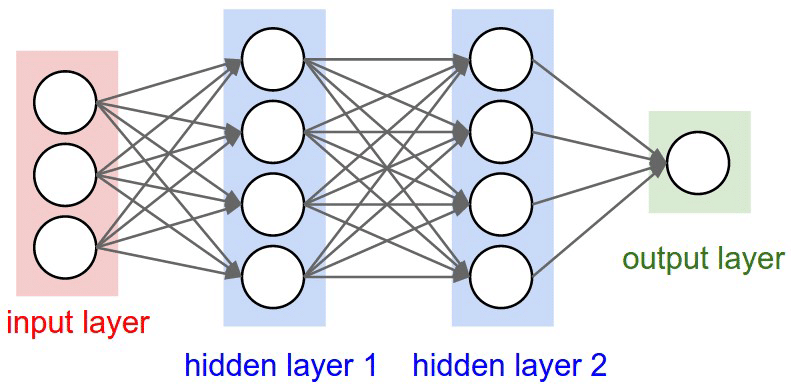

An input layer that will get the data. The size of the input layer depends on the size of the input data.
Some hidden layers that will allow the NN to learn complex interactions within the data. A Neural Network with a lot of hidden layers is called a Deep Neural Network.
An output layer that will give the final result, for instance a class prediction. The size of this layer depends on the type of output we want to produce (e.g. how many classes do we want to predict?)
Classic NNs are usually composed of several fully connected layers. This means that every neuron of one layer is connected to every neurons of the next layer.

Convolutional Neural Networks also have Convolutional layers that apply sliding functions to group of pixels that are next to each other. Therefore those structures have a better understanding of patterns that we can observe in images. We will explain this in more details after.

Now let's define the architecture of our CNN:

In [ ]:
from keras.layers import Dense, Input, Dropout, GlobalAveragePooling2D, Flatten, Conv2D, BatchNormalization, Activation, MaxPooling2D
from keras.models import Model, Sequential
# from keras.optimizers import Adam
from tensorflow.keras.optimizers import Adam
# number of possible label values
nb_classes = 7

# Initialising the CNN
model = Sequential()
# 1 - Convolution
model.add(Conv2D(64,(3,3), padding='same', input_shape=(48, 48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 2nd Convolution layer
model.add(Conv2D(128,(5,5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
# 3rd Convolution layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 4th Convolution layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
# Flattening
model.add(Flatten())

# Fully connected layer 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(nb_classes, activation='softmax'))

opt = Adam(lr=0.0001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

We define our CNN with the following global architecture:

4 convolutional layers
2 fully connected layers
The convolutional layers will extract relevant features from the images and the fully connected layers will focus on using these features to classify well our images. 

Let's focus on how our convolution layers work. Each of them contain the following operations:

A convolution operator: extracts features from the input image using sliding matrices to preserve the spatial relations between the pixels. The following image summarizes how it works:
The green matrix corresponds to the raw image values. The orange sliding matrix is called a 'filter' or 'kernel'. This filter slides over the image by one pixel at each step (stride). During each step, we multiply the filter with the corresponding elements of the base matrix. There are different types of filters and each one will be able to retrieve different image features:

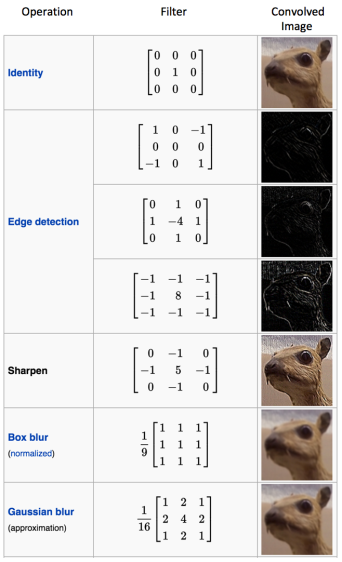

We apply the ReLU function to introduce non linearity in our CNN. Other functions like tanh or sigmoid could also be used, but ReLU has been found to perform better in most situations.
Pooling is used to reduce the dimensionality of each features while retaining the most important information. Like for the convolutional step, we apply a sliding function on our data. Different functions can be applied: max, sum, mean... The max function usually performs better.

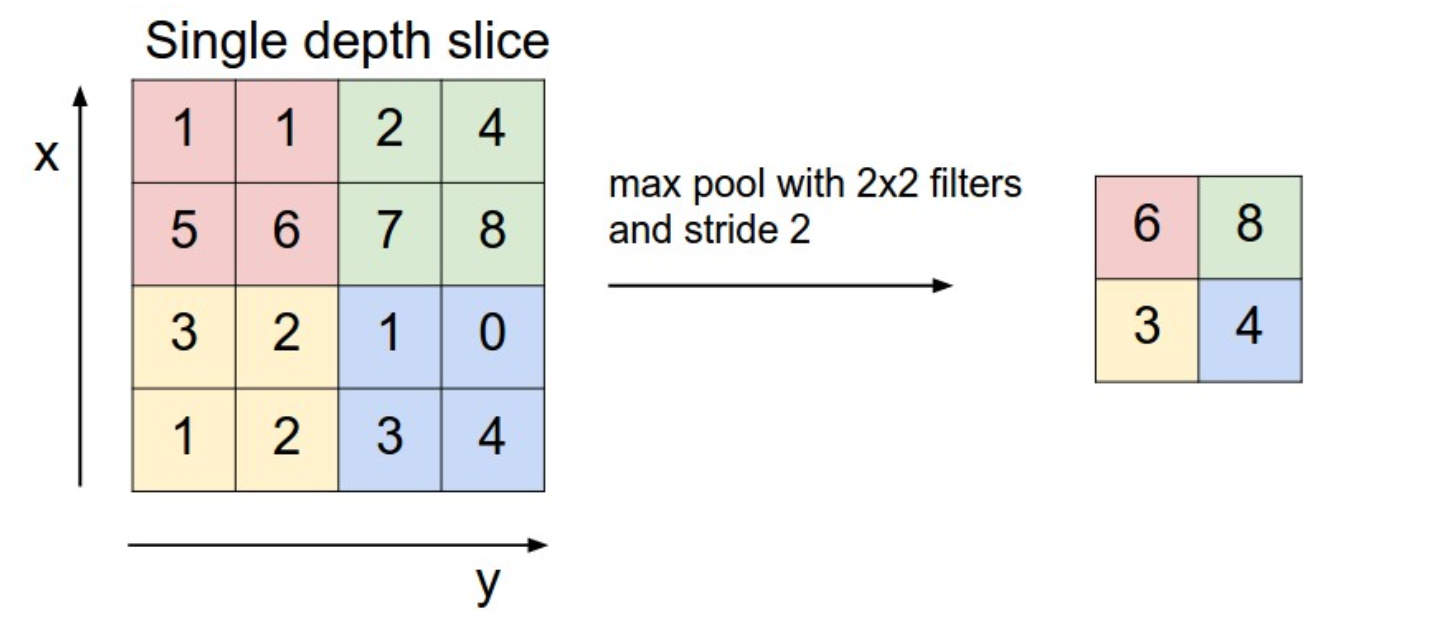

We also use some common techniques for each layer:

Batch normalization: improves the performance and stability of NNs by providing inputs with zero mean and unit variance.
Dropout: reduces overfitting by randomly not updating the weights of some nodes. This helps prevent the NN from relying on one node in the layer too much.
We chose softmax as our last activation function as it is commonly used for multi-label classification.

## **Now that our CNN is defined, we can compile it with a few more parameters. We chose the Adam optimizer as it is one of the most computationally effective. We chose the categorical cross-entropy as our loss function as it is quite relevant for classification tasks. Our metric will be the accuracy, which is also quite informative for classification tasks on balanced datasets.**

## **Train the model**

Everything is set up, let's train our model now!

In [ ]:
# %%time

# number of epochs to train the NN
epochs = 50

from keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint("model_weights.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

history = model.fit_generator(generator=train_generator,
                                steps_per_epoch=train_generator.n//train_generator.batch_size,
                                epochs=epochs,
                                validation_data = validation_generator,
                                validation_steps = validation_generator.n//validation_generator.batch_size,
                                callbacks=callbacks_list
                                )

Our best model managed to obtain a validation accuracy of approximately 65%, which is quite good given the fact that our target class has 7 possible values!

At each epoch, Keras checks if our model performed better than during the previous epochs. If it is the case, the new best model weights are saved into a file. This will allow us to load directly the weights of our model without having to re-train it if we want to use it.

We also have to save the structure of our CNN (layers etc.) into a file:

In [ ]:
# serialize model structure to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

## Analyze the results

We got outputs at each step of the training phase. All those outputs were saved into the 'history' variable. We can use it to plot the evolution of the loss and accuracy on both the train and validation datasets:

In [ ]:
# plot the evolution of Loss and Acuracy on the train and validation sets

import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')


plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

The validation accuracy starts to stabilize at the end of the 50 epochs between 60% and 65% accuracy.

The training loss is slightly higher than the validation loss for the first epochs which can be surprising. Indeed we are more used to see higher validation losses than training losses in machine learning. Here this is simply due to the presence of dropout, which is only applied during the training phase and not during the validation phase.

We can see that the training loss is becoming much smaller than the validation loss after the 20th epochs. This means that our model starts to overfit our training dataset after too much iterations. That is why the validation loss does not decrease a lot after. One solution consists in early-stopping the training of the model.

We could also use some different dropout values and performing data augmentation. Those methods were tested on this dataset, but they did not significantly increase the validation accuracy although they reduced the overfitting effect. Using them slightly increased the training duration of the model.

Finally we can plot the confusion matrix in order to see how our model classified the images:

In [ ]:
# show the confusion matrix of our predictions

# compute predictions
predictions = model.predict_generator(generator=validation_generator)
y_pred = [np.argmax(probas) for probas in predictions]
y_test = validation_generator.classes
class_names = validation_generator.class_indices.keys()

from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    
# compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Normalized confusion matrix')
plt.show()

Our model is very good for predicting happy and surprised faces. However it predicts quite poorly feared faces because it confuses them with sad faces.

With more research and more resources this model could certainly be improved, but the goal of this study was primarily to focus on obtaining a fairly good model compared to what has been done in this field.

# **In conclusion**

Facial expression recognition can have many and varied uses,

For example, converting facial recognition to an emoji that expresses the facial expression.

We delved a lot into the uses of facial expression recognition and were amazed to discover how much the field can be developed in any direction we want.

This idea fascinates us especially and we will continue to expand our project after the comments we will get from you and know more what to focus on.

We will be happy for comments and reinforcements, and know what is expected of us in terms of the size of a project, and we will be happy to know what to change and add to a perfect project.
Thank you very much for the consideration and for providing the time extension and for the immediate help by email.
Hope you enjoyed the topic we chose and the way it was presented.